## 12 General wave theory
### 12.1 One-dimensional wave propagation: representation and wave equation


* Wave: A spatially propagating change (disturbance) or oscillation of a spatial **and** time-dependent physical quantity

  $$u=u(t,\vec{r})\quad \vec{r}\,\,\,\mathrm{: location coordinate}$$
  
* For the propagation e.g. along the $x$-direction

  $$u=u(t,x)$$
  
* The wave does not transport mass. Particles participating in the transport remain stationary on average over time.

* Coupling of the oscillators leads to propagation of the disturbance (transport of energy)
  
  ⇨ Propagation speed is the phase velocity $c$
  
* We distinguish between transverse waves and longitudinal waves

* Transverse waves:
  * Oscillation occurs perpendicular to the direction of propagation
  * Example: rope waves, water waves, electromagnetic waves, earthquakes
  
* Longitudinal waves:
  * Oscillation parallel to the direction of propagation
  * Example: spring, sound waves, rods with longitudinal excitation
  
* Harmonic wave along the positive $x$-direction

  $$u(t,x) = \hat{u} \, \sin\underbrace{\left[\omega\left(t-\frac{x}{c}\right)+\varphi_0\right]}_{\mathrm{Phase}\,\varphi}$$

  * The phase $\varphi$ describes the deflection state of the physical quantity.
  * If the phase $\varphi$ is constant, then
  
    $$t-\frac{x}{c}=\mathrm{konst.}$$ 
  
    must be constant. The minus sign applies to propagation in the positive $x$-direction.
    
* Harmonic wave along the negative $x$-direction


  $$ t+\frac{x}{c}=\mathrm{konst.}$$
  
  ⇨ 
  
  $$u(t,x) = \hat{u} \, \sin\left[\omega\left(t+\frac{x}{c}\right)+\varphi_0\right]$$


* Oscillation of a particle at location $x_0$ :

In [1]:
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


c=1.
def update(x0=0., omega=1., phi0=0):
    t = np.linspace(0, 6 * np.pi,500)
    T=2.*np.pi/omega
    u=np.sin(omega*(t-x0/c)+phi0)
    
    fig = plt.figure(figsize=(9,4))
    
    plt.plot(t/T,u)
    plt.xlabel(r'Time $(t/T)$',fontsize=15)
    plt.ylabel(r'Amplitude',fontsize=15)
    arrowed_spines(fig, plt.gca())
    if omega>=0.5:
        lx1=((np.pi/2.-phi0)/omega+x0/c)/T
        lx2=((5*np.pi/2.-phi0)/omega+x0/c)/T
        plt.plot([lx1,lx1],[1,-1],'k','-.')
        plt.plot([lx2,lx2],[1,-1],'k','-.')
        plt.text((lx1+(lx2-lx1)/2.),-.42,r'$T$',fontsize=15)
        #plt.annotate(s='', xy=(lx2,-0.5), xytext=(lx1,-0.5), arrowprops=dict(arrowstyle='<->'))
    plt.show()

interact(update,x0=(-1.,1.), omega=(0.2,2.), phi0=(-1.6,1.6));

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.0, min=-1.0), FloatSlider(value=1.0, desc…

Period duration ⇨ temporal periodicity
  $$ \omega = \frac{2\pi}{T} $$

A nice wave simulator from U Colorado is available [here](https://phet.colorado.edu/sims/html/wave-on-a-string/latest/wave-on-a-string_en.html).


  ----
* Instantaneous image of a wave at the time $t=t_0$
  ⇨ $u(t_0,x)$

In [2]:
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


c=1.
def update(t0=0., omega=1., phi0=0):
    x = np.linspace(0, 6 * np.pi,500)
    l = 2*np.pi*c/omega
    u=np.sin(omega*(t0-x/c)+phi0)
    
    fig = plt.figure(figsize=(9,4))
    
    plt.plot(x/l,u,'r')
    plt.xlabel(r'Ort $(x/\lambda)$',fontsize=15)
    plt.ylabel(r'Amplitude',fontsize=15)
    arrowed_spines(fig, plt.gca())
    if omega>=0.5:
        lx1=c*((np.pi/2.+phi0)/omega+t0)/l
        lx2=c*((+5*np.pi/2.+phi0)/omega+t0)/l
        plt.plot([lx1,lx1],[1,-1],'k','-.')
        plt.plot([lx2,lx2],[1,-1],'k','-.')
        plt.text((lx1+(lx2-lx1)/2.),-.42,r'$\lambda$',fontsize=15)
        #plt.annotate(s='', xy=(lx2,-0.5), xytext=(lx1,-0.5), arrowprops=dict(arrowstyle='<->'))
    plt.show()

interact(update,t0=(-1.,3.), omega=(0.2,2.), phi0=(-1.6,1.6));

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-1.0), FloatSlider(value=1.0, desc…

  Wavelength ⇨ Spatial periodicity
  
  ⇨ Wave number: 
  $$k=\frac{2\pi}{\lambda}$$


  * Relationship to the phase velocity

  $$c=\frac{\lambda}{T}=\frac{2\,\pi}{T}\cdot \frac{\lambda}{2\,\pi}=\omega \cdot \frac{1}{k}$$
  
  
  ⇨$$c=\frac{\omega}{k}$$
  
  Insert into the wave equation
  
  ⇨
  \begin{eqnarray}
  u(t,x)&=&\hat{u}\,\sin\left(\omega\, t-k\, x +\varphi_0\right)\\
  &=& \hat{u} ,\sin\left(\frac{2\pi}{T}\, t-\frac{2\pi}{\lambda}\, x +\varphi_0\right)
  \end{eqnarray}

* General partial differential equation (PDE) for a wave: 
  \begin{eqnarray}
  \frac{\partial^2\,u}{\partial\, x^2}&=&-\hat{u}\,k^2\,\sin\left(\omega t - kx -\varphi_0\right)\\
    \frac{\partial^2\,u}{\partial\, t^2}&=&-\hat{u}\,\omega^2\,\sin\left(\omega t - kx -\varphi_0\right)
  \end{eqnarray}
  
  Insert the 2nd order derivatives:
  
  \begin{eqnarray}
  \frac{1}{\omega^2}\,\frac{\partial^2\,u}{\partial\, t^2}&=&
  \frac{1}{k^2}\frac{\partial^2\,u}{\partial\, x^2}\\
   \frac{k^2}{\omega^2}\,\frac{\partial^2\,u}{\partial\, t^2}&=&
  \frac{\partial^2\,u}{\partial\, x^2}
  \end{eqnarray}
  
  <div class="alert alert-success">
  <b>General wave equation in one dimension</b>
  $$\frac{1}{c^2}\,\frac{\partial^2\,u}{\partial\, t^2}=
  \frac{\partial^2\,u}{\partial\, x^2}$$
  </div>
  ⇨ $c$ is a material property
 

### 12.2 Energy transport and intensity

* Starting point: instantaneous view of a wave on a rope

  $$u(x,t)=\hat{u}\sin (\omega t - k x - \varphi_0)$$

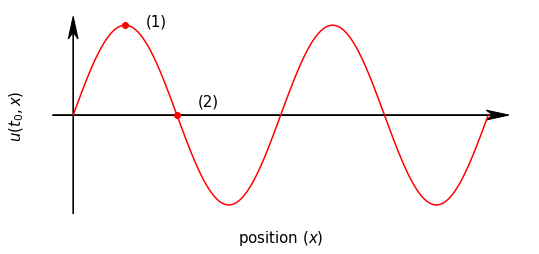

In [3]:
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


c=1.
t0=0.
omega=1.
phi0=0.
x = np.linspace(0, 4 * np.pi,500)
l = 2*np.pi*c/omega
u=-np.sin(omega*(t0-x/c)+phi0)

fig = plt.figure(figsize=(9,4))

plt.plot(x,u,'r')
plt.plot(l/4.,1.,'ro')
plt.plot(l/2.,0.,'ro') 
plt.xlabel(r'position $(x)$',fontsize=15)
plt.ylabel(r'$u(t_0,x)$',fontsize=15)
arrowed_spines(fig, plt.gca())
plt.text(l/4+.1*l,1.,r'(1)',fontsize=15)
plt.text(l/2+.1*l,0.1,r'(2)',fontsize=15)
plt.show()

At positions:
(1) no kinetic energy $E_{kin}=0$ and maximum potential energy

(2) $E_{pot}=0$ and maximum kinetic energy

* Averaging over a full period $T$

  $$\overline{E_{ges}}=\overline{E_{kin}}+\overline{E_{pot}}$$
  
  ⇨ $\overline{E_{kin}}=\overline{E_{pot}}$
  
* a small mass element $\mathrm{d}m$:

  $$\mathrm{d} E_{kin} = \frac{\mathrm{d}m}{2}\cdot \dot{u}^2 \quad \mathrm{with}\quad \dot{u}=\omega \hat{u}\cos (\omega t - k x +\varphi_0)$$
  
  $$\mathrm{d} \overline{E_{kin}}=\frac{1}{T}\int_0^T \mathrm{d} E_{kin}$$
  
  for $\mathrm{d}m=\rho \cdot \mathrm{d}V$
  
  $$\mathrm{d} \overline{E_{kin}} = \frac{1}{2} \cdot \frac{1}{2}\, \underbrace{\rho\,\mathrm{d}V}_{\mathrm{d}m}\,\hat{u}^2\,\omega^2$$
  
  $$\overline{E_{ges}}=2 \overline{E_{kin}}\quad \mathrm{as}\quad \overline{E_{kin}}=\overline{E_{pot}}$$
  
  $$\overline{E_{ges}}=\frac{1}{2} \rho \, \mathrm{d}V \, \hat{u}^2 \, \omega^2$$
  
  The energy density (energy per volume):
  
  $$\frac{\overline{E_{ges}}}{\mathrm{d}V}=W=\frac{1}{2} \rho \, \hat{u}^2 \, \omega^2$$
  
  Unit: $$\left[\mathsf{W}\right]=\mathsf{\frac{J}{m^3}=\frac{W s}{m^3}}$$
  
  * Transfer of energy with the speed $c$
  ⇨ Energy flux density or intensity of the wave
  
  $$J = W \, c = \frac{1}{2} \rho \, \hat{u}^2\, \omega^2 \, c$$
  
  The intensity can also be described as a power per area.
  
  $$J=\frac{P}{A}$$
  
   Unit: $$\mathsf{\left[J\right]=\frac{W}{m^2}}$$

### 12.3 Wave propagation in space

* Wave fronts: Connection of all points with the same deflection state, i.e. with $\varphi=\mathrm{const.}$
  * Point excitation in space
  ⇨ Spherical surface ⇨ Spherical waves
  * Point excitation in the plane
  ⇨ Circular waves
  <img src="figures/25.3_1.png" alt="25.3_1" style="width: 200px;"/>
  * Wave fronts are planes
  ⇨ plane waves
  <img src="figures/25.3_2.png" alt="25.3_2" style="width: 200px;"/>
  <p>
  Surfaces of constant phase of a plane wave
  <img src="figures/25.3_3.png" alt="25.3_3" style="width: 200px;"/>
  <p>
* The wavenumber vector $\vec{k}$ is used to describe the propagation in space. $\vec{k}$ indicates the direction of propagation of the wave.
  $$\vec{k}=\underbrace{\left|\vec{k}\right|}_{\frac{2\pi}{\lambda}} \, \vec{e}_k$$
  
  $$\vec{k}=k_x\,\vec{e}_x+k_y\,\vec{e}_y+k_z\,\vec{e}_z$$
  
  $$\vec{r}=x\,\vec{e}_x+y\,\vec{e}_y+z\,\vec{e}_z$$
  
  $$u(t,r)=\hat{u}\cdot\sin\left(\omega t - \vec{k}\cdot \vec{r} + \varphi_0\right)$$
  
  <img src="figures/25.3_4.png" alt="25.3_4" style="width: 250px;"/>
  
  Example: Propagation along $x$-direction:
  Area of constant phase
  $$\omega t - k_x x + \varphi_0=\mathrm{const.}$$
  <p>
  
  General:
  
  <img src="figures/25.3_5.png" alt="25.3_5" style="width: 250px;"/>
  

  
  \begin{eqnarray}
  A(\vec{r},t)&=&\hat{A}\,\sin\left(\omega\,t - \vec{k}\cdot\vec{r}+\varphi_0 \right)\\
  A(\vec{r},t)&=&\hat{A}\,\sin\left(\omega\,t - k_x\cdot x - k_y\cdot y- k_z\cdot z+\varphi_0 \right)\\
  \end{eqnarray}
  
  **Complex notation:**
  
  $$A(\vec{r},t)=\hat{A} e^{i\left(\omega\,t-\vec{k}\cdot\vec{r}+\varphi_0\right)}$$
  
  If the amplitude has a direction:
  
  $$\vec{A}(\vec{r},t)=\vec{\hat{A}} e^{i\left(\omega\,t-\vec{k}\cdot\vec{r}+\varphi_0\right)}$$
  
  **Longitudinal waves:**
  
  Amplitude is parallel to the direction of propagation, $\vec{\hat{A}}\parallel \vec{k}$. 
  
  **Transverse waves:**
  
  Amplitude is perpendicular to the direction of propagation, $\vec{\hat{A}}\bot \vec{k}$. 
  
  
  
  
* Intensity for different cases depending on the distance $|\vec{r}|$ to the excitation center:
  * plane wave $I=\mathrm{const.}$
  * spherical wave $I\propto r^{-2}$
  * Circular wave $I\propto r^{-1}$

### 12.4 Wave propagation in media 

#### 12.4.1 The tensioned string (transverse wave)

* Tensile force $\vec{F}$

* Mass element: $\mathrm{d}m=\rho\,A\,\mathrm{d}x$
  
  <img src="figures/25.4_1.png" alt="25.4_1" style="width: 400px;"/>

* Reverse driving force:

  \begin{eqnarray}
  \mathrm{d}\,F_{\mathrm{Rück}}&=&\mathrm{d}m\,a_y= \mathrm{d}m\,\frac{\partial^2\,y}{\partial\,t^2}=\rho\,A\,\mathrm{d}x\,\frac{\partial^2\,y}{\partial\,t^2}\tag{12.4.1}\\
  \mathrm{d}\,F_{\mathrm{Rück}}&=& F_y(x+\mathrm{d}x)-F_y(x)\\
  &=&F\,\sin(\alpha+\mathrm{d}\alpha)-F\,\sin(\alpha)
  \end{eqnarray}
  <p>
* For small deflections 
  
  $$\tan(\alpha)\approx\sin(\alpha)\approx \alpha$$
  <p>
* $\mathrm{d} F_{\mathrm{back}}=F\,\mathrm{d}\alpha$
  <p> 
* $\tan\alpha=\lim_{\Delta x\rightarrow 0}\frac{\Delta y}{\Delta x}=\frac{\partial y}{\partial x}$  
  <p>
* $\alpha=\alpha(x)$, therefore

  $$\mathrm{d}\alpha = \frac{\partial \alpha}{\partial x}\,\mathrm{d}x=\frac{\partial^2\,y}{\partial x^2}\,\mathrm{d}x$$
  
* Insert into Eq. (12.4.1)

  $$F\,\frac{\partial^2\,y}{\partial x^2}\,\mathrm{d}x=\rho\,A\,\mathrm{d}x\,\frac{\partial^2\,y}{\partial\,t^2}$$
  <div class=“alert alert-info”>
  <p>
  $$F\,\frac{\partial^2\,y}{\partial\,x^2}=A\,\rho\,\frac{\partial^2\,y}{\partial\,t^2}$$ 
  </div>
  <p>
* General wave equation
  <p><div class=“alert alert-info”>
  <p>
  $$\frac{\partial^2\,y}{\partial\,x^2}=\frac{1}{c^2}\frac{\partial^2\,y}{\partial\,t^2}$$
  </div>
  <p>
    
* Phase velocity
  
  $$\frac{A\,\rho}{F}=\frac{1}{c^2}$$
  
  or
  
  $$c=\sqrt{\frac{F}{A\,\rho}}$$
  <P>
* Discuss the phase velocity as a function of the cable tension $F$, density $\rho$ and cross-sectional area $A$.